In [1]:
#import yfinance as yf
#import pandas as pd
#from newsapi import NewsApiClient
#initializing the news API client
#newsapi = NewsApiClient(api_key='ad131f0e6a2045428fdac63ee288e9a5')  

In [2]:
#importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset

In [5]:
file_path = 'D:\\ML PROJECTS\\Market_maestro\\datasets\\Sentiment_analysis_data\\data.csv'  # Update with the actual file path
data = pd.read_csv(file_path, header=None, encoding='ISO-8859-1')

In [6]:
# Assign column names
data.columns = ['Sentiment', 'News_Headline']

In [7]:
#DATA VISUALIZATION AND EXPLORATION 

In [8]:
# Basic statistics
data.describe()

,Sentiment,News_Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [9]:
#having a few duplicates can provide more examples for the model,
#which can help it learn better,
#especially if the sentiment is balanced.
#syntax to remove the duplicates
#data = data.drop_duplicates()

In [10]:
data.head(10)

,Sentiment,News_Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


In [11]:
data.tail(10)

,Sentiment,News_Headline
4836,negative,"Operating profits in the half were 0.8 m , do..."
4837,negative,"Sales in Finland decreased by 2.0 % , and inte..."
4838,negative,The company said that its comparable operating...
4839,negative,Operating result for the 12-month period decre...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...
4845,negative,Sales in Finland decreased by 10.5 % in Januar...


In [12]:
# Assign shape of the dataset
data_shape = data.shape

# Check for missing values
missing_values = data.isnull().sum()

# Display the shape and missing values
data_shape, missing_values

((4846, 2),
 Sentiment        0
 News_Headline    0
 dtype: int64)

In [13]:
# sentiments distribution
sentiment_distribution = data['Sentiment'].value_counts()

# Display the distribution
sentiment_distribution

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [14]:
# Display the first few news headlines
headlines_sample = data['News_Headline'].sample(5, random_state=1)
headlines_sample

910     The pilot project proved that RIFD technology ...
1715    Aspocomp has repaid its interest bearing liabi...
4700    Operating profit fell to EUR 15.1 mn from EUR ...
2776    After the restructuring , UPM 's average paper...
4284           This is bad news for the barbeque season .
Name: News_Headline, dtype: object

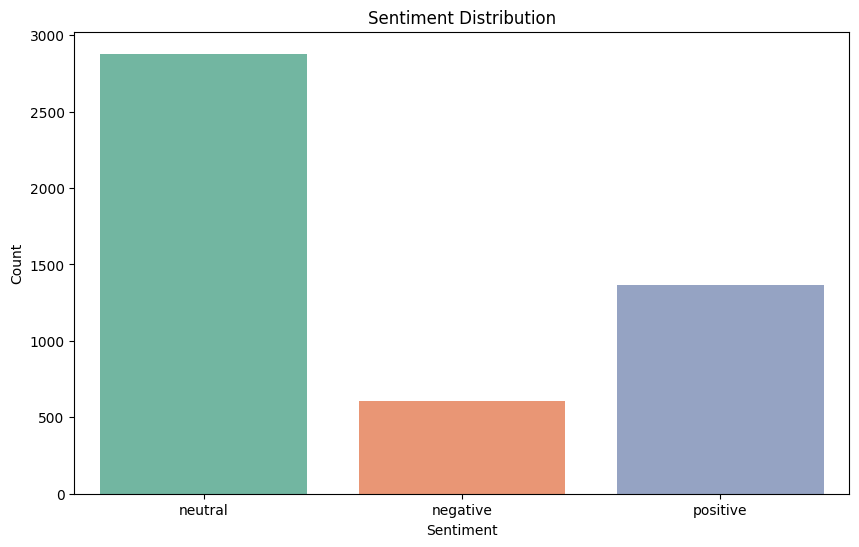

In [15]:
#sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sentiment', hue='Sentiment', palette='Set2', dodge=False, legend=False)  # Setting 'hue' and disabling the legend
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

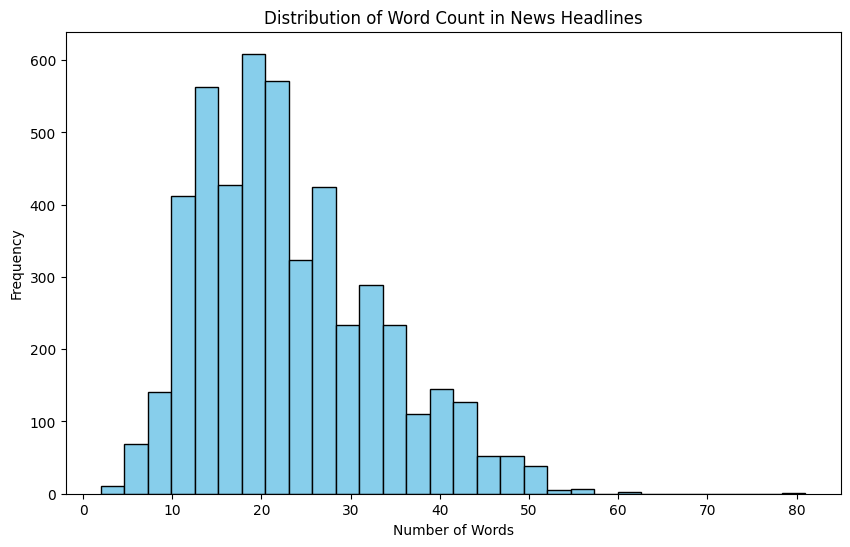

In [16]:
#How long the newshead line are by number of words
# Plot the distribution of word counts without creating a new column
plt.figure(figsize=(10, 6))
word_counts = data['News_Headline'].apply(lambda x: len(str(x).split()))  # Calculate word count for each news headline
plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Count in News Headlines')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

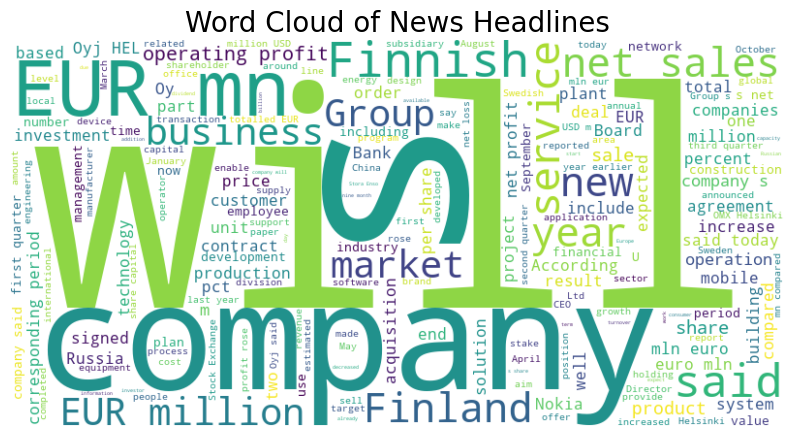

In [17]:
#Word Cloud of Headlines
#the higher the frequency the bigger the worg is presented in the wordcloud 
from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all headlines into a single string
text = ' '.join(data['News_Headline'].astype(str))  # Convert to string and join

# Create a word cloud of the headlines with a custom colormap
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of News Headlines', fontsize=20)
plt.show()

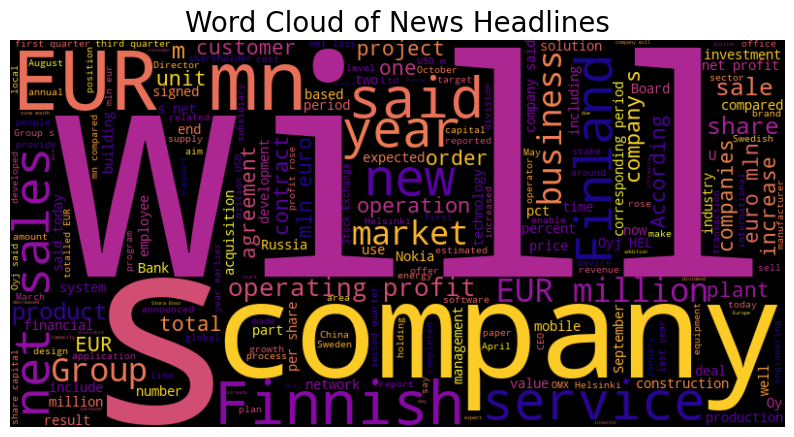

In [18]:
# Same word cloud of the headlines with a circular shape
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma', max_words=200, contour_color='white', contour_width=1).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of News Headlines', fontsize=20)
plt.show()

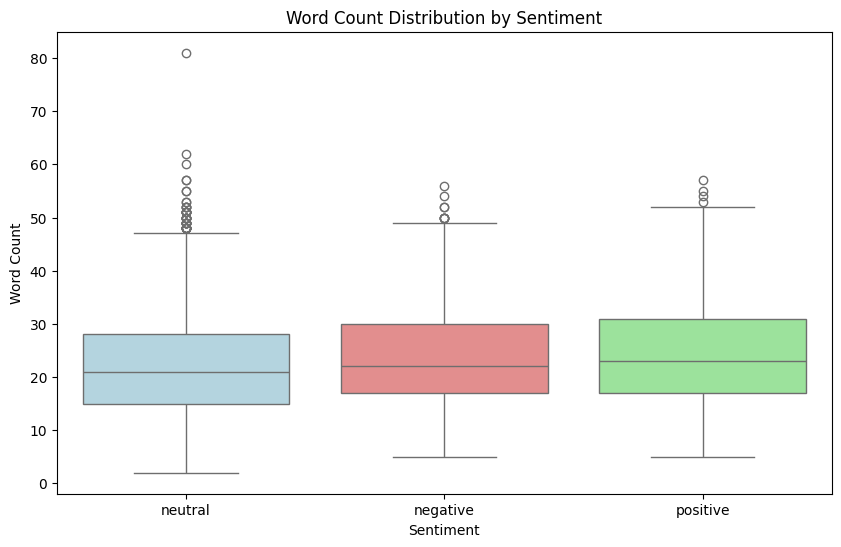

In [19]:
# Boxplot of word count by sentiment with distinct colors
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = {
    'positive': 'lightgreen',
    'neutral': 'lightblue',
    'negative': 'lightcoral'
}

# Boxplot of word count by sentiment without creating a new column
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Sentiment',
    y=data['News_Headline'].apply(lambda x: len(str(x).split())),  # Calculate word count on the fly
    hue='Sentiment',  # Assign the sentiment column to hue
    data=data,
    palette=custom_palette,
    legend=False  # Disable the legend
)
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

In [20]:
"""
# Visualization Report

## Objective
This visualization shows how the word count of news headlines varies by sentiment (positive, negative, neutral). The goal is to see if longer headlines are linked to certain sentiments.

## Description of the Data
The dataset contains news headlines and their sentiment labels. Each headline is marked as positive, negative, or neutral, indicating its tone.

## Key Observations
- Positive headlines generally have more words than negative and neutral ones.
- There are some very long negative headlines that stand out as outliers.
- Neutral headlines are usually shorter and more similar in length.

## Insights Gained
The results suggest that positive news often needs more words to explain the story, while neutral news tends to be shorter and to the point. The longer negative headlines may indicate more complex stories.

## Next Steps
Next, I plan to:
- Create word clouds for each sentiment type to see common words.
- Perform some statistical tests to compare word counts.
- Look for connections between sentiment and other factors in the data.

This will help me understand more about how news is reported and what it means for sentiment analysis.
"""

'\n# Visualization Report\n\n## Objective\nThis visualization shows how the word count of news headlines varies by sentiment (positive, negative, neutral). The goal is to see if longer headlines are linked to certain sentiments.\n\n## Description of the Data\nThe dataset contains news headlines and their sentiment labels. Each headline is marked as positive, negative, or neutral, indicating its tone.\n\n## Key Observations\n- Positive headlines generally have more words than negative and neutral ones.\n- There are some very long negative headlines that stand out as outliers.\n- Neutral headlines are usually shorter and more similar in length.\n\n## Insights Gained\nThe results suggest that positive news often needs more words to explain the story, while neutral news tends to be shorter and to the point. The longer negative headlines may indicate more complex stories.\n\n## Next Steps\nNext, I plan to:\n- Create word clouds for each sentiment type to see common words.\n- Perform some st